# Capstone Project: Week 3

### Import Packages

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib notebook

### Import Dataset

In [32]:
df = pd.read_csv("Data Sets/Capstone Course/Data-Collisions.csv", low_memory = False)

In [33]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [34]:
df.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

### Columns of Interest

In [35]:
cols = ['SEVERITYCODE', 'ADDRTYPE', 'LIGHTCOND', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'UNDERINFL', 'SPEEDING']

### Check Columns for NA

In [36]:
df_select = df[cols]

for col in cols:
    print(str(col) + " NAN Count: " + str(df_select[col].isna().sum()))

SEVERITYCODE NAN Count: 0
ADDRTYPE NAN Count: 1926
LIGHTCOND NAN Count: 5170
COLLISIONTYPE NAN Count: 4904
JUNCTIONTYPE NAN Count: 6329
WEATHER NAN Count: 5081
UNDERINFL NAN Count: 4884
SPEEDING NAN Count: 185340


<IPython.core.display.Javascript object>


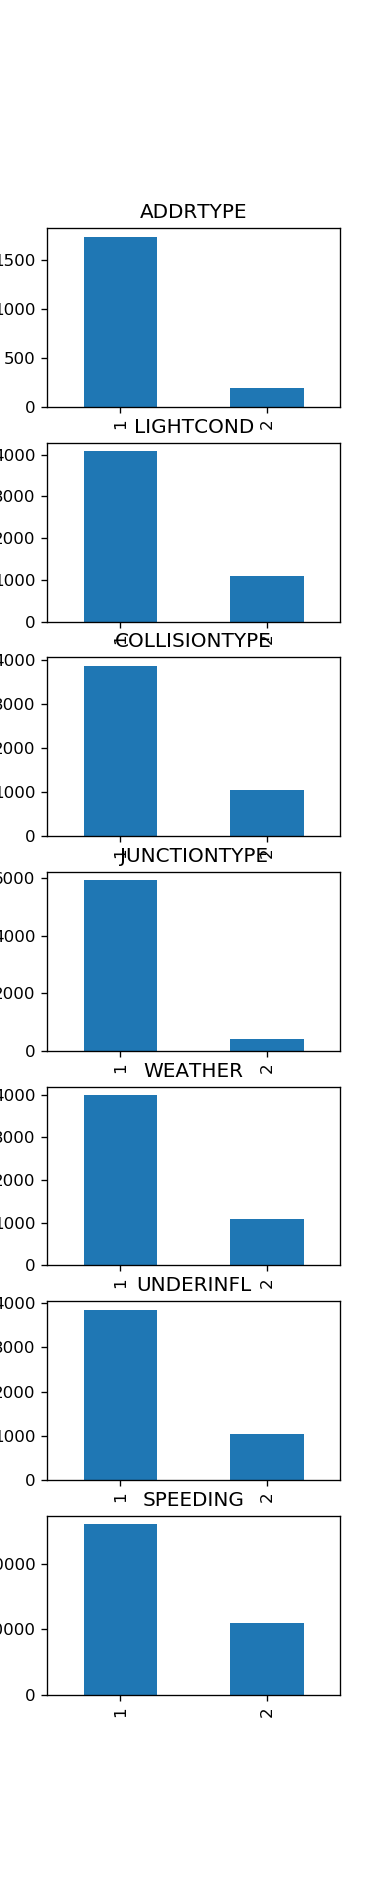

In [37]:
fig, ax = plt.subplots(len(cols) - 1, 1, figsize = (8,2*len(cols)))
i=0

for col in cols[1:]:
    df_select[['SEVERITYCODE', col]][df_select[col].isna()]\
    .SEVERITYCODE.value_counts().plot(kind = 'bar', title = str(col), ax=ax[i])
    i += 1

#### SPEEDING Fill NA

In [38]:
df_select = df_select.fillna({'SPEEDING': 0})
df_select['SPEEDING'].replace({"Y": 1},inplace = True)

#### UNDERINFL Fill NA

In [39]:
df_select = df_select.fillna({'UNDERINFL': 0})
df_select['UNDERINFL'].replace({"Y": 1, "N": 0, "1": 1, "0": 0}, inplace = True)

In [40]:
df_select['SPEEDING'].unique()

array([0, 1], dtype=int64)

### Assess the impact that 'UNDERINFL' AND 'SPEEDING' has on 'SEVERITYCODE'

In [41]:
df_temp = df_select[['SEVERITYCODE', 'UNDERINFL', 'SPEEDING']]

In [42]:
X = df_temp[['SEVERITYCODE']]
y = df_temp.iloc[:,1:]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)
tree_class.score(X_test, y_test)

0.9108878341449382

<IPython.core.display.Javascript object>


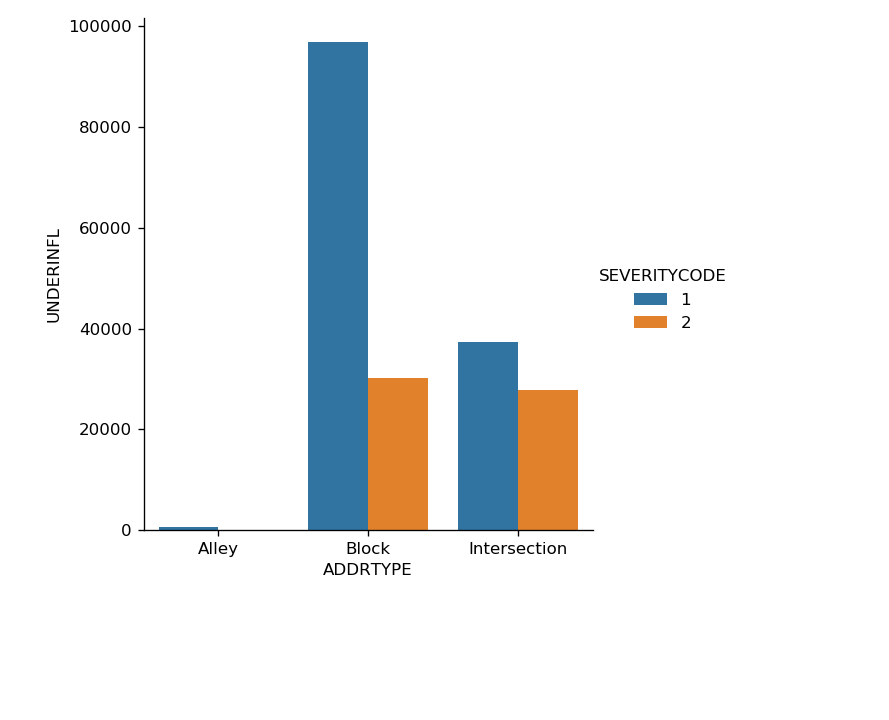

<IPython.core.display.Javascript object>


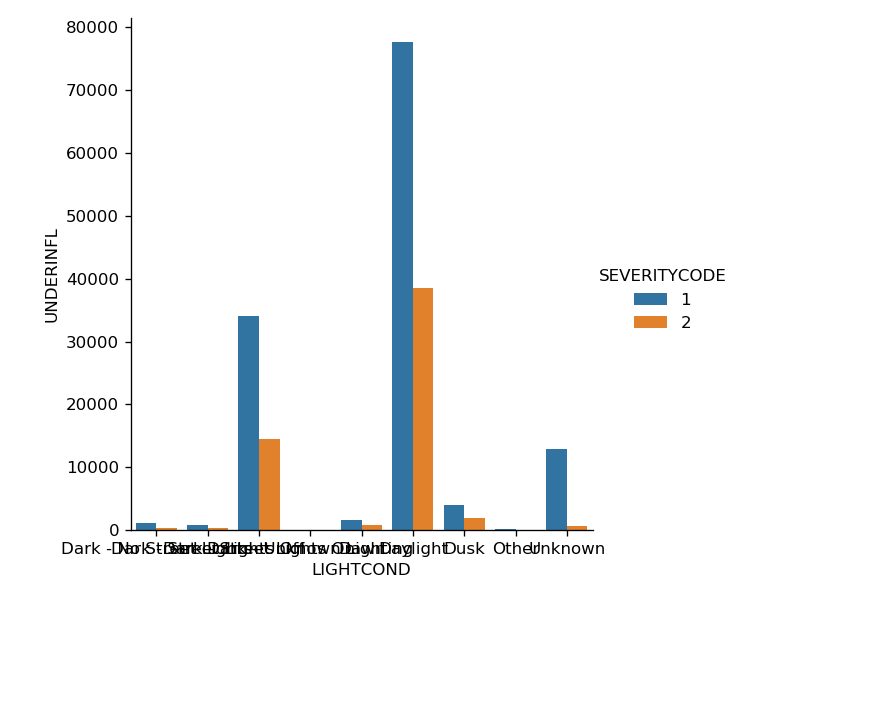

<IPython.core.display.Javascript object>


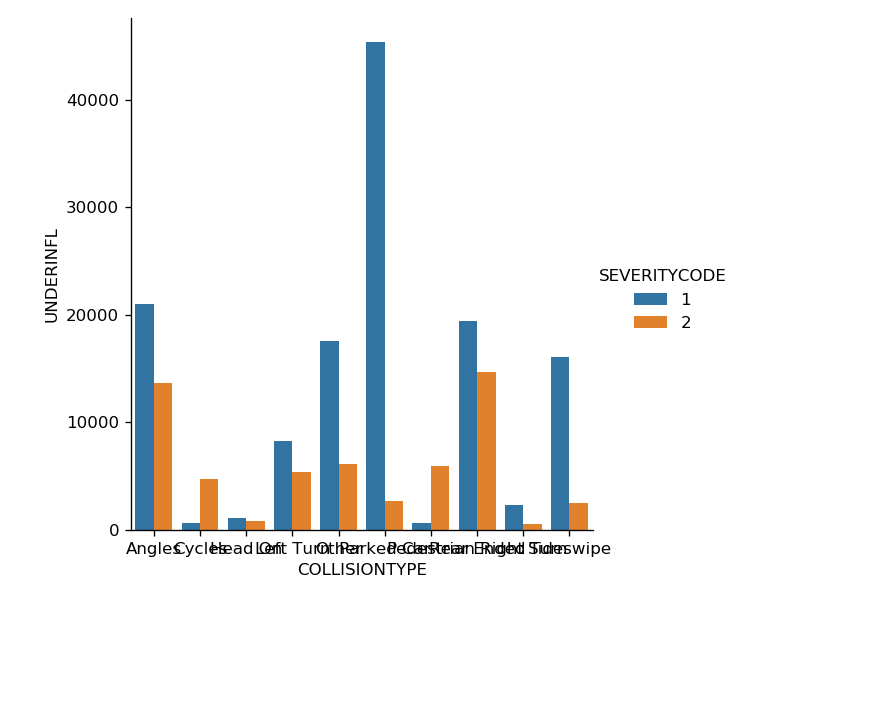

<IPython.core.display.Javascript object>


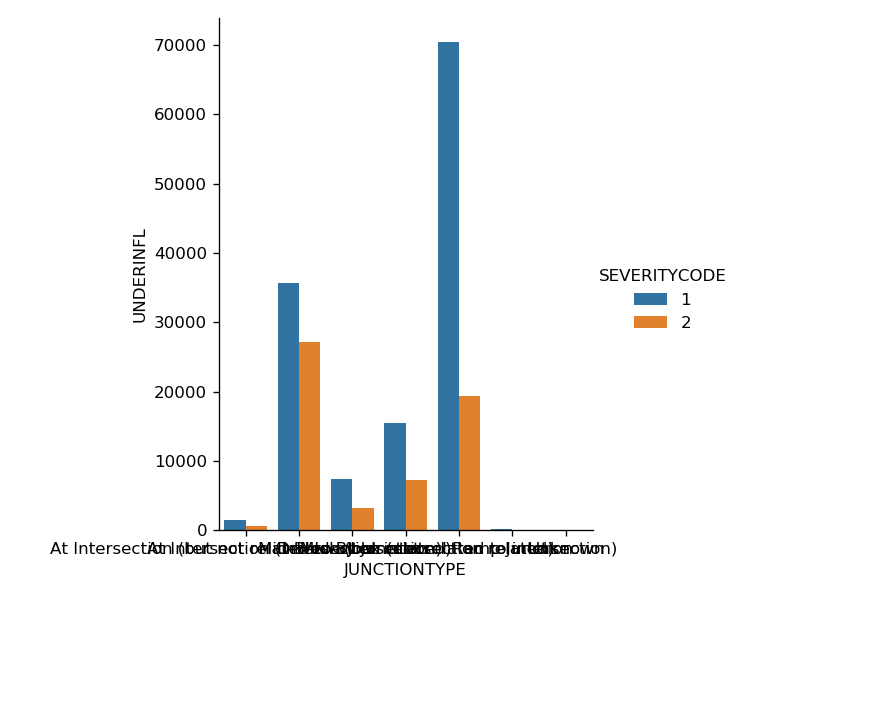

<IPython.core.display.Javascript object>


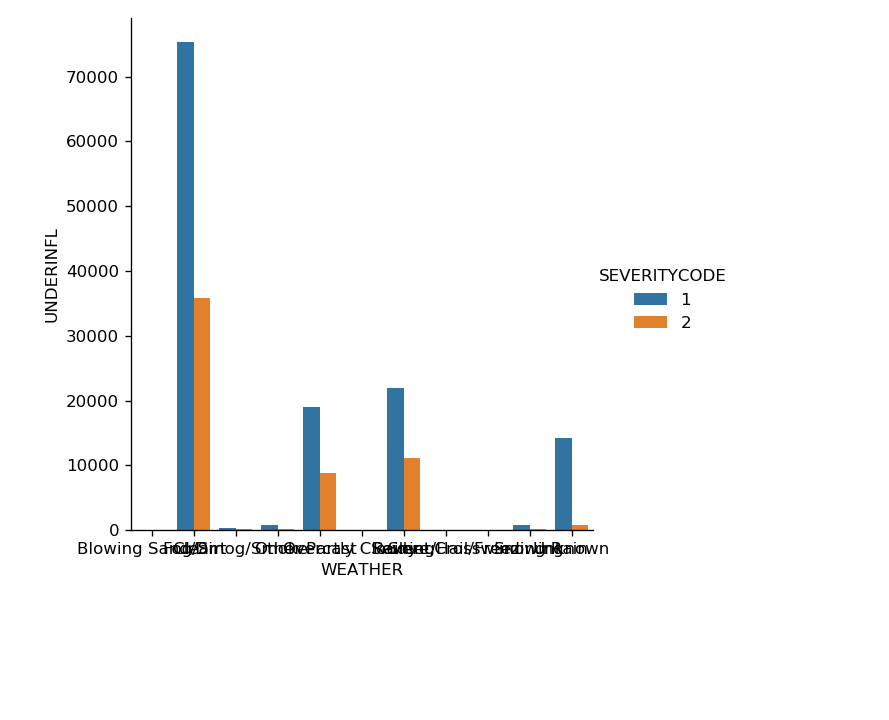

In [79]:
def plot_cat_cols():
    plot_cols = ['ADDRTYPE', 'LIGHTCOND', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'UNDERINFL']
    i = 0
    
    for col in plot_cols:
        if(col == "UNDERINFL"):
            break
        else:
            temp = df_select.groupby(['SEVERITYCODE',col]).count()
            temp_ = temp[['UNDERINFL']].reset_index()
            sns.catplot(data = temp_, kind = 'bar', x = col, y = 'UNDERINFL', hue = 'SEVERITYCODE')
        i+=1
            
            
plot_cat_cols()
            
            

            

# temp = pd.pivot_table(df_select[['SEVERITYCODE','ADDRTYPE']],
#                index = 'ADDRTYPE', columns = 'SEVERITYCODE',
#               aggfunc = len)




<IPython.core.display.Javascript object>


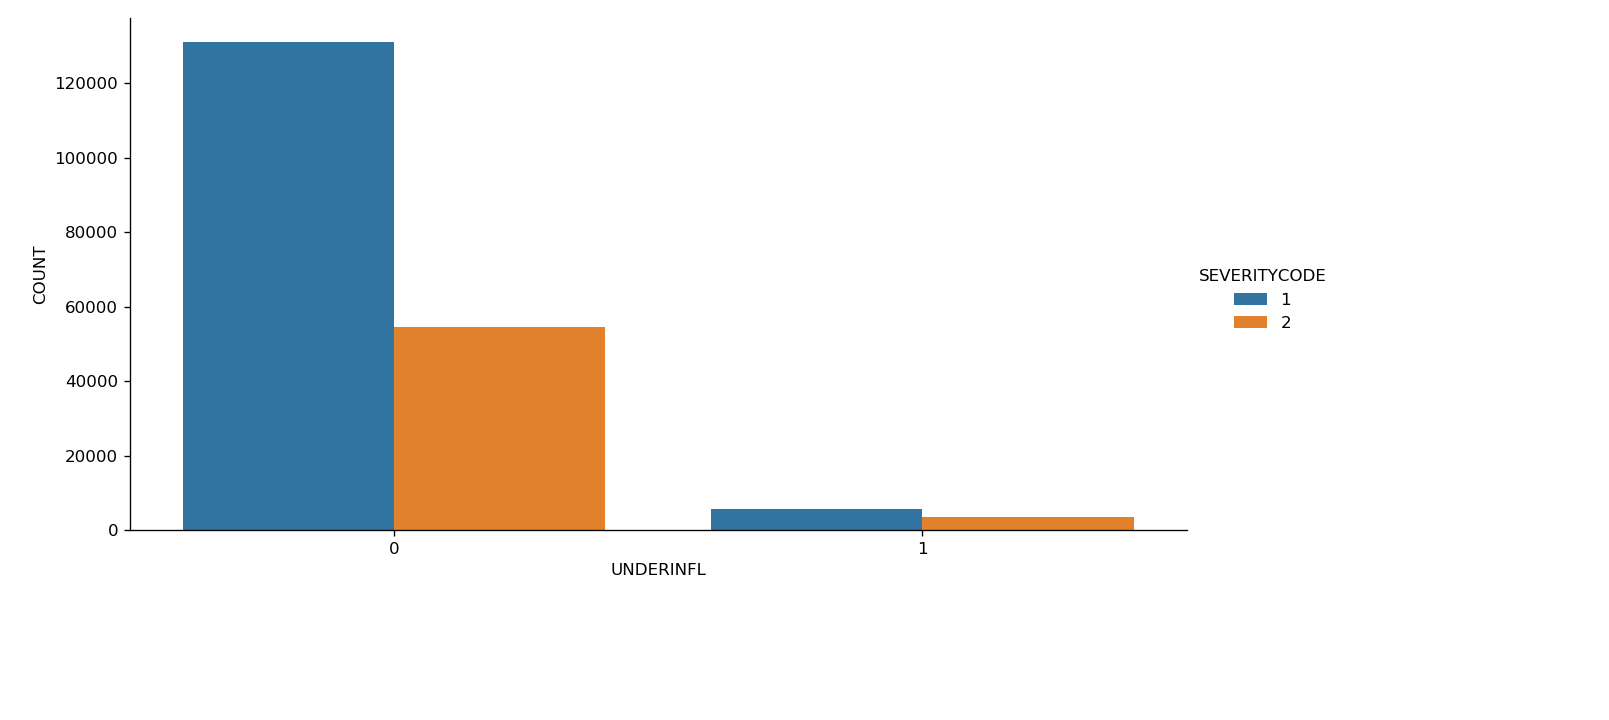

In [96]:
temp = df_select.groupby(['SEVERITYCODE','UNDERINFL']).count()
temp_ = temp[['SPEEDING']].reset_index()
temp_.rename(columns  ={'SPEEDING': 'COUNT'}, inplace = True)
sns.catplot(data = temp_, kind = 'bar', x = 'UNDERINFL', y = 'COUNT', hue = 'SEVERITYCODE', aspect = 2)

In [64]:
df_select  = df_select.fillna({'LIGHTCOND': 'Unknown'})
df_select  = df_select.fillna({'JUNCTIONTYPE': 'Unknown'})
df_select  = df_select.fillna({'WEATHER': 'Unknown'})

In [72]:
X_cat = pd.get_dummies(df_select[['ADDRTYPE', 'LIGHTCOND', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER']])
y_cat = df_select[['SEVERITYCODE']]
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat)

In [107]:
cat_tree = DecisionTreeClassifier()
cat_tree.fit(X_train, y_train)
cat_tree.score(X_test, y_test)

0.7477860650516756